#### Python для анализа данных (социальные науки)

## Контрольная работа по Pandas

Контрольная работа проводится после блока по Pandas

*Автор: Татьяна Рогович, НИУ ВШЭ*

**Списывание и использование телефонов** 

Первое предупреждение, сделанное ассистентом или преподавателем: - 1 балл к вашей оценке.

Второе предупреждение: работа аннулируется без права переписывания.

Задания с подозрением на списанные аннулируются всем студентам. Если кто-то признается, что именно он списал работу, то аннулированная оценка остается только у списавшего.

Если больше четырех заданий совпадают у двух студентов, аннулириуется вся работа.

**Оформление, стиль, эффективность (штраф до 1 балла)**

За каждый тип повторяющейся стилистической ошибки снимается 0.25 балла. Повторяющейся считаем ошибку, допущенную минимум 2 раза.

0.25 балла снимается за каждые 4 не систематические ошибки (4 разных ошибки, допущенных по одному разу.)

Так же из этого балла могут сниматься штрафы 0.25 за использование ненужных функций (мы не оцениваем здесь эффективность решения, но смотрим на такие вещи, как, например, перевод строкового вода в строку - лишняя ненужная операция). Мы делаем вывод, что вы не до конца понимаете, как работает код.

Все задачи должны принимать значения на ввод (решение для частного случая там, где в условии говорится, что подается на ввод, будет считаться неполным). Неполные решения могут быть зачтены с оценкой равной доле от полного возможного балла за этот пункт.

In [1]:
from pathlib import Path

import pandas as pd
import seaborn as sns
from scipy.stats import norm

import matplotlib as mpl

%matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = (12, 8)

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
path = Path.cwd().parent.parent \
    / 'data' / 'datasets' / 'pima-indians-diabetes.csv'

data = pd.read_csv(path)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1. (0.5 балла)__

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов (но мы должны видеть как вы это делали). 

Для тех переменных, в которых есть пропуске, выведите количество пропущенных значений в следующем формате:

"В переменной {название переменной} {количество} пропущенных значений"

In [4]:
status = data.isna().sum()
for column, count in status.items():
    if count:
        print(f"В переменной {column} {count} пропущенных значений")

В переменной Glucose 5 пропущенных значений
В переменной BloodPressure 35 пропущенных значений
В переменной SkinThickness 227 пропущенных значений
В переменной Insulin 374 пропущенных значений
В переменной BMI 11 пропущенных значений


__Задание 2. (1 балл)__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [5]:
for column in ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'):
    data[column] = data[column].fillna(data[column].median())

data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Class                       0
dtype: int64

__Задание 3. (0.5 балла)__

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [6]:
total = data.describe().T
total['var'] = data.var()

total

,count,mean,std,min,25%,50%,75%,max,var
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,11.354056
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00,926.489244
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00,146.328741
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00,77.285567
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00,7462.033002
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.4000,36.60000,67.10,47.267706
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,0.109779
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00,138.303046
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,0.227483


__Задание 4. (0.5 балла)__

У скольких женщин старше 50 лет обнаружен диабет?

In [7]:
data[(data.Age > 50) & (data.Class == 1)].shape[0]  # старше 50 с диабетом

38

__Задание 5. (0.5 балла)__

Найдите трех женщин с наибольшими числом беременностей.

In [8]:
data.sort_values(by='Pregnancies', ascending=False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6. (0.5 балла)__

Сколько женщин успели родить 3 или более детей до 30 лет?

In [9]:
data[(data.Pregnancies >= 3) & (data.Age < 30)].shape[0]

117

__Задание 7. (1 балл)__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [10]:
data['NormalBloodPressure'] = ((data.BloodPressure >= 80) & (data.BloodPressure <= 89)).astype(int)

percent = 100 * data.NormalBloodPressure.sum() / data.shape[0]
print(f"Процент женщин с нормальным давлением: {percent:.2f}")

Процент женщин с нормальным давлением: 18.88


__Задание 8. (1 балл)__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [11]:
data[(data.BMI >= 30) & (data.BloodPressure > data.BloodPressure.mean())].shape[0]

251

__Задание 9. (1 балл)__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [12]:
data.groupby('Class')['Glucose'].mean()

Class
0    110.682000
1    142.130597
Name: Glucose, dtype: float64

In [13]:
data.groupby('Class')['BloodPressure'].mean()

Class
0    70.920000
1    75.123134
Name: BloodPressure, dtype: float64

In [14]:
data.groupby('Class')['Insulin'].mean()

Class
0    127.792000
1    164.701493
Name: Insulin, dtype: float64

__Задание 10. (0.5 балла)__

Постройте круговую диаграмму для признака __Class__.

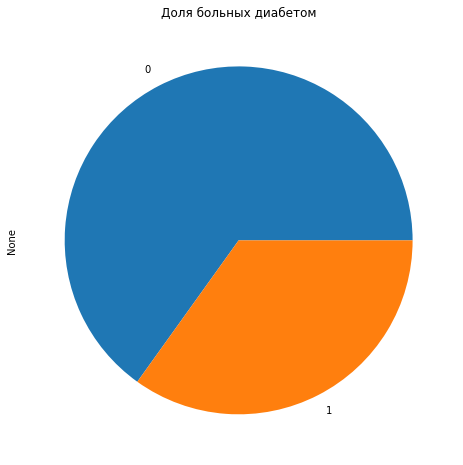

In [15]:
data.groupby('Class').size().plot(kind='pie', title='Доля больных диабетом');

__Задание 11. (0.5 балла + 0.5 балла)__

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

*Доп. баллы*
Постройте нормальное распределение поверх графика.

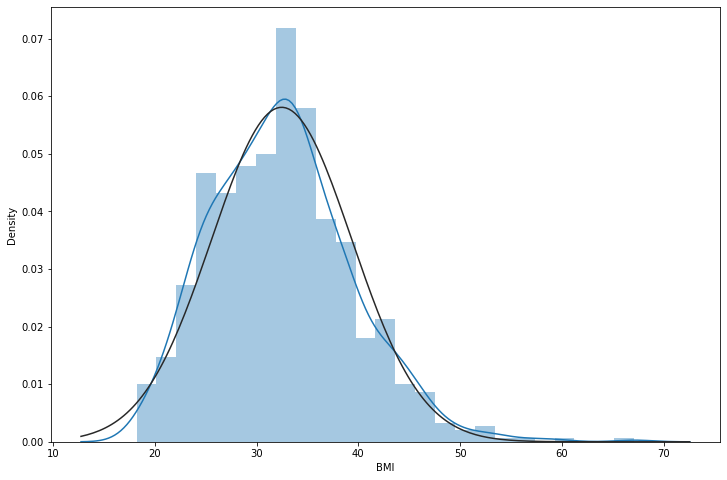

In [16]:
sns.distplot(data.BMI.dropna(), fit=norm);

Как видно из графика, распределение BMI достаточно хорошо может быть описано с помощью нормального закона распределения. Однако, требуются дополнительные тесты, для проверки гипотезы о том, что BMI имеет нормальное распределение. Математическое ожидание BMI больше 30, следовательно, большинство исследуемых женщин страдает избыточным весом.

__Задание 12. (1 балл)__

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

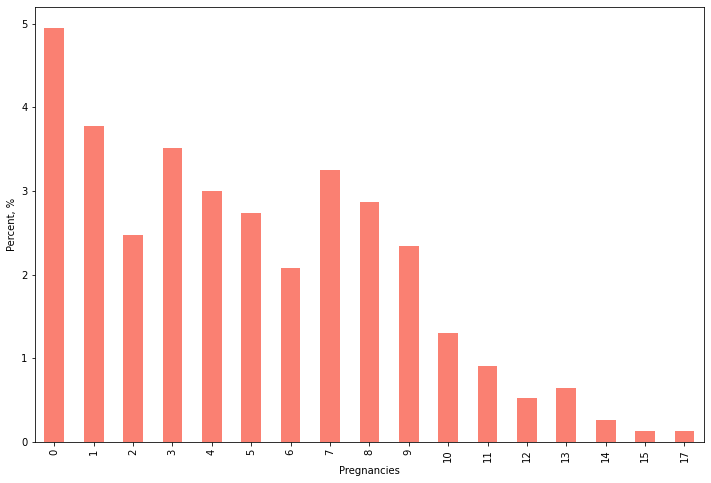

In [17]:
(100 * data.groupby('Pregnancies')['Class'].sum() / data.shape[0]).plot(
    kind='bar',
    ylabel='Percent, %',
    color='salmon'
);

__Задание 13. (0.5 балла)__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [18]:
data['WasPregnant'] = (data['Pregnancies'] > 0).astype(int)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,NormalBloodPressure,WasPregnant
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,1
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0


__Задание 14. (0.5 балла)__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [19]:
grouped = data.groupby('WasPregnant')

100 * grouped['Class'].sum() / grouped.count()['Class']

WasPregnant
0    34.234234
1    35.007610
Name: Class, dtype: float64

__Задание 15. (бонусное:  1 балл)__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 
    
Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [20]:
def get_body_type(bmi: float) -> str:
    if bmi <= 18.5:
        return "Underweight"
    elif bmi < 25.0:
        return "Normal weight"
    elif bmi < 30.0:
        return "Overweight"
    else:
        return "Obesity"


data['BodyType'] = data['BMI'].apply(get_body_type)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,NormalBloodPressure,WasPregnant,BodyType
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,0,1,Obesity
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,0,1,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,0,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,Obesity


__Задание 16. (бонусное:  0.5 балла)__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [21]:
healthy = data[(data.NormalBloodPressure == 1) & (data.BodyType == "Normal weight")]
percent = 100 * healthy[healthy.Class == 1].shape[0] / healthy.shape[0]

print(f"Процент условно здоровых женщин больных диабетом: {percent:.2f} %")

Процент условно здоровых женщин больных диабетом: 10.00 %
